###Import data from drive


In [ ]:
#importing all the relevant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop,Adam, SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt



In [ ]:
#mounting and unzipping the dataset.zip file provided
from google.colab import drive
drive.mount('/gdrive')
!cd /content/gdrive/MyDrive/
!unzip /gdrive/MyDrive/dataset.zip

Mounted at /gdrive
/bin/bash: line 0: cd: /content/gdrive/MyDrive/: No such file or directory
Archive:  /gdrive/MyDrive/dataset.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/readme.txt      


In [ ]:
#importing the dataset
df = pd.read_csv('dataset/train.csv')

In [ ]:
#hyperparams:
batch_size=64
epochs=15

In [ ]:
#data preprocessing
df_train = df

#converting the data into the required format using numpy array
train_labels = df_train['emotion'].to_numpy()
train_samples = len(train_labels)
train_labels = train_labels.reshape((train_samples, 1))
train_data = df_train['pixels'].to_numpy()
for i, data_point in enumerate(train_data):
  a = data_point.split(" ")
  data_point = np.array([int(pix_val) for pix_val in a])
  train_data[i] = data_point

#additional code provided for the test data n which the model is to be tested 
# public_test_labels = df_public_test['emotion'].to_numpy()
# public_test_samples = len(public_test_labels)
# public_test_labels = public_test_labels.reshape((public_test_samples, 1))
# public_test_data = df_public_test['pixels'].to_numpy()
# for i, data_point in enumerate(public_test_data):
#   a = data_point.split(" ")
#   data_point = np.array([int(pix_val) for pix_val in a])
#   public_test_data[i] = data_point
 
#creating a  numpy array of the train data and the test data
train_data = np.array([image.reshape((48, 48, 1)) for image in train_data])
# public_test_data = np.array([image.reshape((48, 48, 1)) for image in public_test_data])

train_data = train_data / 255.0
train_labels = to_categorical(train_labels)
# public_test_data = public_test_data / 255.0

In [ ]:
#the cnn model
model=models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (2,2),padding = 'Same', activation ='relu', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', activation ='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', activation ='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
#the fully connected layer
model.add(Dense(512, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(7, activation = "softmax"))

#compiling the model defined above
model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 48, 48, 32)        160       
_________________________________________________________________
batch_normalization_72 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 48, 48, 32)        4128      
_________________________________________________________________
batch_normalization_73 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
history = model.fit(train_data, train_labels, batch_size = batch_size, epochs = epochs, validation_split=0.2)

Epoch 1/15
437/437 [==============================] - 8s 18ms/step - loss: 0.7456 - accuracy: 0.7215 - recall_8: 0.6409 - precision_8: 0.7960 - val_loss: 1.0074 - val_accuracy: 0.6523 - val_recall_8: 0.5874 - val_precision_8: 0.7144
Epoch 2/15
437/437 [==============================] - 8s 18ms/step - loss: 0.7281 - accuracy: 0.7284 - recall_8: 0.6513 - precision_8: 0.8026 - val_loss: 1.0014 - val_accuracy: 0.6496 - val_recall_8: 0.5860 - val_precision_8: 0.7200
Epoch 3/15
437/437 [==============================] - 8s 18ms/step - loss: 0.7238 - accuracy: 0.7303 - recall_8: 0.6534 - precision_8: 0.8004 - val_loss: 1.0205 - val_accuracy: 0.6433 - val_recall_8: 0.5827 - val_precision_8: 0.7098
Epoch 4/15
437/437 [==============================] - 8s 18ms/step - loss: 0.7212 - accuracy: 0.7311 - recall_8: 0.6528 - precision_8: 0.7996 - val_loss: 1.0263 - val_accuracy: 0.6546 - val_recall_8: 0.5950 - val_precision_8: 0.7116
Epoch 5/15
437/437 [==============================] - 8s 18ms/step -

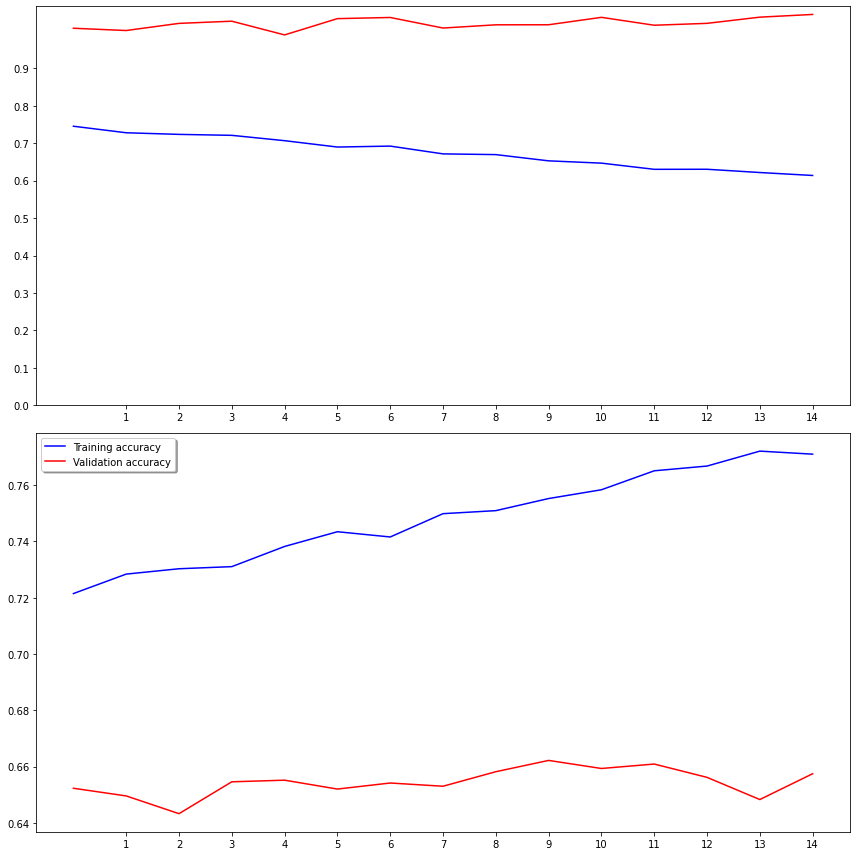

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
model.save("/gdrive/MyDrive/model")